In [ ]:
# Author : Ruchit Vithani
# ID : 201701070
# IE407-Machine Learning 
# Lab 6

# Importing the libraries

In [19]:
import numpy as np
import pandas as pd
import h5py
import matplotlib.pyplot as plt

# Load dataset

In [20]:
f = h5py.File('faceimages.mat','r')
f.keys()

<KeysViewHDF5 ['Database_name', 'Record_Name', 'data', 'height', 'width']>

In [60]:
data = np.array(f['data'])
height = int(np.array(f['height']))
width = int(np.array(f['width']))
data.shape, height, width
tot_features = height*width

In [22]:
images = data[:-1, :]
images.shape

(10304, 400)

# Example Image

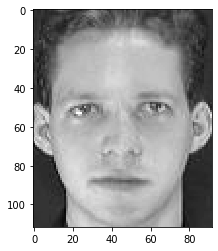

In [65]:
a = images[:, 0].reshape((width, height)).T
plt.imshow(a, cmap='gray')

# Plot of mean image : 
* Mean image is plot of mean vector obtained by taking mean over every dimension of the dataset

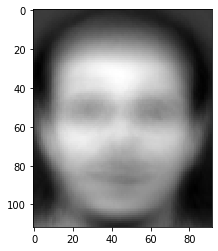

In [24]:
u = np.mean(images, axis=1, keepdims=True)
a = u.reshape((width, height)).T
plt.imshow(a, cmap='gray')

# PCA Steps : 
 
* Calculate the covariance matrix of the input data
* From the covariance matrix, obtain the eigenvalues and eigenvectors corresponding to cov matrix
* Select respectively 50, 100, 400 eigen vectors with highest eigen values in order to reduce the dimensionality to respectively 50, 100, 400.
* Reconstruct the original image in 10304 dimensions. Observe the results. Calculate the error in reconstructed image

### Computing covariance matrix

In [25]:
X = images - u
cov = np.cov(X)

### Obtain the eigenvalues and eigenvectors corresponding to the covariance matrix

In [26]:
w, v = np.linalg.eigh(cov)

### Reduce the dimemsionality : 
   ##### Note that following line uses all the eigenvectors of the cov matrix. This will not reduce any dimensionality. In order to reduce the dimensionality, use only the desired number of highest valued eigen vectors. 

In [27]:
Y = np.dot(v.T, X)
Y.shape

(10304, 400)

## Using 50 most significant components

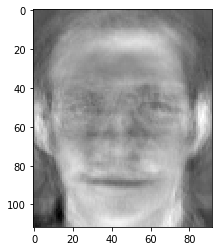

error norm :  117.81263089620381


In [66]:
recon = np.dot(v[:, -50:],Y[-50:, :])
a = recon[:, 0].reshape((width, height)).T
plt.imshow(a, cmap='gray')
plt.show()

# Calculating L1 norm of error 
norm = np.sqrt(np.sum(abs(recon[:, 0] - images[:, 0])**2)/tot_features)
print("error norm : ", norm)

## Using 100 most significant components

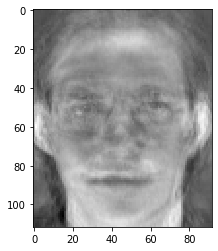

error norm :  117.41152871513208


In [67]:
recon = np.dot(v[:, -100:],Y[-100:, :])
a = recon[:, 0].reshape((width, height)).T
plt.imshow(a, cmap='gray')
plt.show()

# Calculating L1 norm of error 
norm = np.sqrt(np.sum(abs(recon[:, 0] - images[:, 0])**2)/tot_features)
print("error norm : ", norm)

## Using 400 most significant components

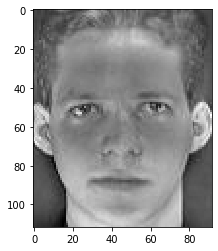

error norm :  116.73032468347839


In [68]:
recon = np.dot(v[:, -400:],Y[-400:, :])
a = recon[:, 0].reshape((width, height)).T
plt.imshow(a, cmap='gray')
plt.show()

# Calculating L1 norm of error 
norm = np.sqrt(np.sum(abs(recon[:, 0] - images[:, 0])**2)/tot_features)
print("error norm : ", norm)